# K-means clustering

## import the modules


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline


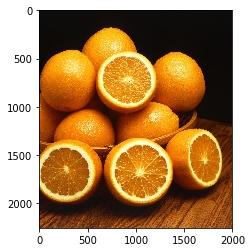

In [2]:
image = cv2.imread(r'D:\00_Python Scripts\Test\udacity_nano_computervision\CVND_Exercises-master\1_3_Types_of_Features_Image_Segmentation\images\oranges.jpg')
image_copy = np.copy(image)

image_copy=cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)


## prepare data for k-means

In [12]:
pixel_vals = image_copy.reshape(-1,3)

# convert to float type
pixel_vals = np.float32(pixel_vals) # opencv k-means algorithm expects this kind of data
#plt.scatter(pixel_vals[0:][0], pixel_vals[0:][1], pixel_vals[0:][2])
#plt.show()


## Implement k-means

In [15]:
k = 4
criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)# max iterations = 10, epsilon = 1
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10,cv2.KMEANS_RANDOM_CENTERS)
# centers provides a point in a colour space, k = 2, splits into two colors
# labels are either 0 or 1 that belonging to eachcolor category centers

# convert the data back to 8 bit image
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0], image_copy.shape[1])


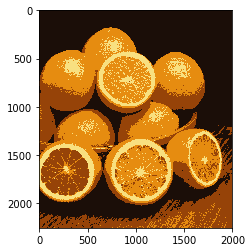

In [17]:
plt.imshow(segmented_image)

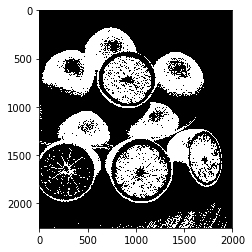

In [18]:
plt.imshow(labels_reshape ==2, cmap='gray')
